In [1]:
import sys
import os
import pandas as pd
import numpy as np
from utils.mining_data_tb import mineria_pacientes_parcial
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pacientes_lung = pd.read_csv("../data/LUNG_PATIENT_DATA.tsv", sep='\t')
pacientes_pancreas= pd.read_csv("../data/pancreas_PATIENT_DATA_oncoprint.tsv", sep='\t')

In [3]:
pacientes_pancreas_clean = mineria_pacientes_parcial(pacientes_pancreas)
pacientes_pancreas_clean

track_name,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
TCGA-IB-7886,Male,80,4.0437913009,Not Hispanic Or Latino,41
TCGA-FB-AAPY,Male,71,34.81605681,Not Hispanic Or Latino,32
TCGA-HZ-7925,Male,66,11.966992142999999,Not Hispanic Or Latino,20
TCGA-IB-7889,Female,85,11.572475918,Not Hispanic Or Latino,38
TCGA-FB-AAPQ,Male,65,37.150277805,Not Hispanic Or Latino,36
...,...,...,...,...,...
TCGA-F2-7276,Male,64,7.1012920406,Not Hispanic Or Latino,0
TCGA-HZ-7923,Male,65,10.323174541,Not Hispanic Or Latino,0
TCGA-HZ-8519,Male,73,14.925863825999999,Not Hispanic Or Latino,0
TCGA-IB-AAUT,Male,65,9.4355130355,Not Hispanic Or Latino,0


In [4]:
pacientes_lung_clean = mineria_pacientes_parcial(pacientes_lung)
pacientes_lung_clean

track_name,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
TCGA-55-8094,Male,51,17.786106454000002,Not Hispanic Or Latino,395
TCGA-99-8033,Female,74,21.566886938000003,Not Hispanic Or Latino,168
TCGA-69-7978,Male,59,4.405431173399999,Not Hispanic Or Latino,546
TCGA-86-A4JF,Male,56,14.334089489,Not Hispanic Or Latino,1228
TCGA-44-8117,Female,54,12.657395535,Not Hispanic Or Latino,679
...,...,...,...,...,...
TCGA-97-7546,Female,76,41.25982181,Not Hispanic Or Latino,252
TCGA-97-7547,Female,67,25.479172831,Not Hispanic Or Latino,158
TCGA-97-7552,Male,70,26.235328928,Not Hispanic Or Latino,35
TCGA-97-8174,Male,67,5.391721734600001,Not Hispanic Or Latino,158


In [23]:
pacientes_lung_clean['Diagnosis Age'] = pd.to_numeric(pacientes_lung_clean['Diagnosis Age'])
pacientes_pancreas_clean['Diagnosis Age'] = pd.to_numeric(pacientes_pancreas_clean['Diagnosis Age'])
pacientes_lung_clean['Progress Free Survival (Months)'] = pd.to_numeric(pacientes_lung_clean['Progress Free Survival (Months)'])
pacientes_pancreas_clean['Progress Free Survival (Months)'] = pd.to_numeric(pacientes_pancreas_clean['Progress Free Survival (Months)'])
pacientes_lung_clean['Mutation Count'] = pd.to_numeric(pacientes_lung_clean['Mutation Count'])
pacientes_pancreas_clean['Mutation Count'] = pd.to_numeric(pacientes_pancreas_clean['Mutation Count'])

In [5]:
mutaciones_bruto_lung = pd.read_csv("../data/LUNG_alterations_across_samples.tsv", sep='\t')
mutaciones_bruto_pancreas = pd.read_csv("../data/pancreas_alterations_across_samples.tsv", sep='\t')

In [6]:
mutaciones_bruto_lung.set_index('Patient ID', inplace=True)
mutaciones_bruto_pancreas.set_index('Patient ID', inplace=True)

In [7]:
mutaciones_bruto_lung = mutaciones_bruto_lung.iloc[:,2:]
mutaciones_bruto_pancreas = mutaciones_bruto_pancreas.iloc[:,2:]

In [8]:
mutaciones_bruto_lung = mutaciones_bruto_lung.replace(['no alteration', 'not profiled'],'0')
mutaciones_bruto_pancreas = mutaciones_bruto_pancreas.replace(['no alteration', 'not profiled'],'0')

In [9]:
mutaciones_bruto_lung1 = mutaciones_bruto_lung[mutaciones_bruto_lung.Altered != 0]
mutaciones_bruto_pancreas1 = mutaciones_bruto_pancreas[mutaciones_bruto_pancreas.Altered != 0]


In [10]:
mutaciones_bruto_lung1.drop(['Altered'], axis=1, inplace = True)
mutaciones_bruto_pancreas1.drop(['Altered'], axis=1, inplace = True)

C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
mutaciones_bruto_lung1.replace('0', np.nan, inplace=True)
mutaciones_bruto_pancreas1.replace('0', np.nan, inplace=True)


C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
code = ('A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R')
def sustituir(df, code):
    code = ('A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R')
    diccionario = {key:value for key, value in zip(mutaciones_bruto_lung1.columns, code)}
    diccionario
    for col in df.columns:
        df.loc[df[col].notnull(), col] = diccionario[col]
    return df  
sustituir(df= mutaciones_bruto_lung1, code = code)

C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,TP53,KRAS,KEAP1,EGFR,EGFR.1,STK11,ATM,SMARCA4,LRP1B,TP53: MUT,KRAS: MUT,KEAP1: MUT,EGFR: MUT,STK11: MUT,ATM: MUT,SMARCA4: MUT,LRP1B: MUT
Patient ID,,,,,,,,,,,,,,,,,
LU-A08-43,NaN,NaN,NaN,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN
LUAD-U6SJ7,NaN,B,C,NaN,NaN,F,NaN,NaN,NaN,NaN,K,L,NaN,N,NaN,NaN,NaN
LUAD-E01014,A,NaN,NaN,D,E,NaN,NaN,NaN,NaN,J,NaN,NaN,M,NaN,NaN,NaN,NaN
LUAD-S01404,NaN,B,C,NaN,NaN,NaN,NaN,NaN,I,NaN,K,L,NaN,NaN,NaN,NaN,Q
LUAD-S01381,NaN,NaN,C,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,L,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
luad_tsp_17766,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,NaN,NaN,NaN,NaN,NaN,NaN
luad_tsp_17776,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
luad_tsp_17777,A,B,NaN,NaN,NaN,NaN,NaN,NaN,I,J,K,NaN,NaN,NaN,NaN,NaN,Q


In [13]:
code = ('A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', 'K', 'L')
def sustituir(df, code):
    code = ('A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R')
    diccionario = {key:value for key, value in zip(mutaciones_bruto_pancreas1.columns, code)}
    diccionario
    for col in df.columns:
        df.loc[df[col].notnull(), col] = diccionario[col]
    return df  
sustituir(df= mutaciones_bruto_pancreas1, code = code)

C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT
Patient ID,,,,,,,,,,,,
GARV_0658,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN
GARV_0659,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN
GARV_0660,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN
GARV_0661,A,B,NaN,D,NaN,NaN,G,H,NaN,J,NaN,NaN
GARV_0662,A,B,C,NaN,E,NaN,G,H,I,NaN,K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
PDA_105,A,B,NaN,D,NaN,NaN,G,H,NaN,J,NaN,NaN
PDA_106,NaN,B,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN
PDA_107,A,B,NaN,NaN,NaN,F,G,H,NaN,NaN,NaN,L


In [14]:
mutaciones_bruto_lung1.drop(mutaciones_bruto_lung.iloc[:,5:6], axis = 1, inplace = True)

C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
mutaciones_lung_B = mutaciones_bruto_lung1.copy()
mutaciones_pancreas_B = mutaciones_bruto_pancreas1.copy()

In [16]:
mutaciones_lung_B[mutaciones_bruto_lung1.isnull()==False] = 1
mutaciones_pancreas_B[mutaciones_bruto_pancreas1.isnull()==False] = 1

In [17]:
mutaciones_lung_B = mutaciones_lung_B.fillna(-1)
mutaciones_pancreas_B = mutaciones_pancreas_B.fillna(-1)

In [19]:
mutaciones_pancreas_B

,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT
Patient ID,,,,,,,,,,,,
GARV_0658,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0659,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0660,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0661,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1
GARV_0662,1,1,1,-1,1,-1,1,1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
PDA_105,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1
PDA_106,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
PDA_107,1,1,-1,-1,-1,1,1,1,-1,-1,-1,1


In [20]:
mutaciones_lung_B.apply(pd.to_numeric)
mutaciones_pancreas_B.apply(pd.to_numeric)


,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT
Patient ID,,,,,,,,,,,,
GARV_0658,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0659,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0660,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1
GARV_0661,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1
GARV_0662,1,1,1,-1,1,-1,1,1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
PDA_105,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1
PDA_106,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
PDA_107,1,1,-1,-1,-1,1,1,1,-1,-1,-1,1


In [21]:
Tipos_lung = mutaciones_bruto_lung1.apply(lambda x: ','.join(x.dropna()), axis=1)
Tipos_pancreas = mutaciones_bruto_pancreas1.apply(lambda x: ','.join(x.dropna()), axis=1)

In [22]:
mutaciones_bruto_lung1['Tipos'] = Tipos_lung
mutaciones_bruto_pancreas1['Tipos'] = Tipos_pancreas
mutaciones_lung_B['Tipos'] = Tipos_lung
mutaciones_pancreas_B['Tipos'] = Tipos_pancreas

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
mutaciones_bruto_lung1

,TP53,KRAS,KEAP1,EGFR,STK11,ATM,SMARCA4,LRP1B,TP53: MUT,KRAS: MUT,KEAP1: MUT,EGFR: MUT,STK11: MUT,ATM: MUT,SMARCA4: MUT,LRP1B: MUT,Tipos
Patient ID,,,,,,,,,,,,,,,,,
LU-A08-43,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,"D,M"
LUAD-U6SJ7,NaN,B,C,NaN,F,NaN,NaN,NaN,NaN,K,L,NaN,N,NaN,NaN,NaN,"B,C,F,K,L,N"
LUAD-E01014,A,NaN,NaN,D,NaN,NaN,NaN,NaN,J,NaN,NaN,M,NaN,NaN,NaN,NaN,"A,D,J,M"
LUAD-S01404,NaN,B,C,NaN,NaN,NaN,NaN,I,NaN,K,L,NaN,NaN,NaN,NaN,Q,"B,C,I,K,L,Q"
LUAD-S01381,NaN,NaN,C,NaN,F,NaN,NaN,NaN,NaN,NaN,L,NaN,N,NaN,NaN,NaN,"C,F,L,N"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
luad_tsp_17766,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,NaN,NaN,NaN,NaN,NaN,NaN,"B,K"
luad_tsp_17776,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,"F,N"
luad_tsp_17777,A,B,NaN,NaN,NaN,NaN,NaN,I,J,K,NaN,NaN,NaN,NaN,NaN,Q,"A,B,I,J,K,Q"


In [25]:
mutaciones_bruto_pancreas1

,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT,Tipos
Patient ID,,,,,,,,,,,,,
GARV_0658,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H"
GARV_0659,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H"
GARV_0660,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H"
GARV_0661,A,B,NaN,D,NaN,NaN,G,H,NaN,J,NaN,NaN,"A,B,D,G,H,J"
GARV_0662,A,B,C,NaN,E,NaN,G,H,I,NaN,K,NaN,"A,B,C,E,G,H,I,K"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDA_105,A,B,NaN,D,NaN,NaN,G,H,NaN,J,NaN,NaN,"A,B,D,G,H,J"
PDA_106,NaN,B,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,"B,H"
PDA_107,A,B,NaN,NaN,NaN,F,G,H,NaN,NaN,NaN,L,"A,B,F,G,H,L"


In [26]:
item_counts = mutaciones_bruto_lung1["Tipos"].value_counts()
print(item_counts)

A,J                    97
A,I,J,Q                71
A,D,J,M                54
B,K                    53
D,M                    49
                       ..
F,G,N,O                 1
A,B,F,G,J,K,N,O         1
A,B,F,G,I,J,K,N,O,Q     1
A,D,G,J,M,O             1
A,C,H,J,L,P             1
Name: Tipos, Length: 91, dtype: int64


In [27]:
item_counts = mutaciones_bruto_pancreas1["Tipos"].value_counts()
print(item_counts)

A,B,G,H                193
B,H                    118
A,B,C,G,H,I             65
A,B,D,G,H,J             56
B,C,H,I                 30
A,B,C,D,G,H,I,J         20
A,G                     20
A,B,F,G,H,L             13
A,B,E,G,H,K             12
B,D,H,J                  9
B,E,H,K                  7
A,B,D,E,G,H,J,K          6
A,D,G,J                  5
A,B,D,F,G,H,J,L          5
B,C,D,H,I,J              4
A,B,C,E,G,H,I,K          4
C,I                      4
B,F,H,L                  4
B,C,E,H,I,K              4
A,B,C,D,F,G,H,I,J,L      3
A,E,G,K                  3
A,B,C,F,G,H,I,L          2
C,E,I,K                  2
A,B,E,F,G,H,K,L          2
A,C,G,I                  2
B,C,F,H,I,L              1
B,D,E,H,J,K              1
D,J                      1
A,F,G,L                  1
B,C,E,F,H,I,K,L          1
A,B,C,E,F,G,H,I,K,L      1
F,L                      1
E,K                      1
A,D,E,G,J,K              1
A,C,D,G,I,J              1
Name: Tipos, dtype: int64


In [28]:
mutaciones_lung_B.index.name = pacientes_lung_clean.index.name = 'patient'
lung_simm = mutaciones_lung_B.merge(pacientes_lung_clean, on=list(set(mutaciones_lung_B).intersection(set(pacientes_lung_clean)) | {'patient'}))

In [29]:
lung_simm

,TP53,KRAS,KEAP1,EGFR,STK11,ATM,SMARCA4,LRP1B,TP53: MUT,KRAS: MUT,...,STK11: MUT,ATM: MUT,SMARCA4: MUT,LRP1B: MUT,Tipos,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
patient,,,,,,,,,,,,,,,,,,,,,
LUAD-E01014,1,-1,-1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,"A,D,J,M",Female,60,4.030000,European,166
LUAD-S01404,-1,1,1,-1,-1,-1,-1,1,-1,1,...,-1,-1,-1,1,"B,C,I,K,L,Q",Male,55,10.000000,European,201
LUAD-S01381,-1,-1,1,-1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,"C,F,L,N",Male,61,0.000000,European,209
LUAD-S01331,1,1,-1,-1,1,1,-1,1,1,1,...,1,1,-1,1,"A,B,F,G,I,J,K,N,O,Q",Male,72,13.000000,European,253
LUAD-S01467,1,1,-1,-1,-1,-1,1,1,1,1,...,-1,-1,1,1,"A,B,H,I,J,K,P,Q",Male,60,9.000000,European,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A4YQ,-1,-1,1,-1,-1,-1,1,1,-1,-1,...,-1,-1,1,1,"C,H,I,L,P,Q",Female,69,47.078936,Not Hispanic Or Latino,998
TCGA-NJ-A55A,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,"I,Q",Female,76,0.493145,Not Hispanic Or Latino,99
TCGA-NJ-A55O,-1,1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,-1,"B,F,K,N",Female,56,0.427393,Not Hispanic Or Latino,124


In [30]:
mutaciones_pancreas_B.index.name = pacientes_pancreas_clean.index.name = 'patient'
pancreas_simm = mutaciones_pancreas_B.merge(pacientes_pancreas_clean, on=list(set(mutaciones_pancreas_B).intersection(set(pacientes_pancreas_clean)) | {'patient'}))

In [31]:
pancreas_simm

,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT,Tipos,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
patient,,,,,,,,,,,,,,,,,,
TCGA-3A-A9I7,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,"B,H",Male,45,43.035145,Not Hispanic Or Latino,13
TCGA-3A-A9I9,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,"A,B,G,H",Male,67,16.865569,Not Hispanic Or Latino,94
TCGA-3A-A9IB,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,"A,B,D,G,H,J",Female,69,7.364303,Not Hispanic Or Latino,33
TCGA-3A-A9IC,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,"A,B,G,H",Female,61,24.262748,Not Hispanic Or Latino,31
TCGA-3A-A9IH,1,1,1,1,-1,-1,1,1,1,1,-1,-1,"A,B,C,D,G,H,I,J",Female,66,25.084657,Not Hispanic Or Latino,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XN-A8T3,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,"A,B,G,H",Male,67,31.265411,Hispanic Or Latino,45
TCGA-YB-A89D,-1,1,1,1,-1,-1,-1,1,1,1,-1,-1,"B,C,D,H,I,J",Male,59,11.506723,Not Hispanic Or Latino,31
TCGA-YH-A8SY,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,"A,B,G,H",Female,73,12.756025,Not Hispanic Or Latino,45


In [32]:
mutaciones_bruto_pancreas1.index.name = pacientes_pancreas_clean.index.name = 'patient'
pancreas_nn = mutaciones_bruto_pancreas1.merge(pacientes_pancreas_clean, on=list(set(mutaciones_bruto_pancreas1).intersection(set(pacientes_pancreas_clean)) | {'patient'}))

In [33]:
pancreas_nn

,TP53,KRAS,SMAD4,CDKN2A,ARID1A,LRP1B,TP53: MUT,KRAS: MUT,SMAD4: MUT,CDKN2A: MUT,ARID1A: MUT,LRP1B: MUT,Tipos,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
patient,,,,,,,,,,,,,,,,,,
TCGA-3A-A9I7,NaN,B,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,NaN,"B,H",Male,45,43.035145,Not Hispanic Or Latino,13
TCGA-3A-A9I9,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H",Male,67,16.865569,Not Hispanic Or Latino,94
TCGA-3A-A9IB,A,B,NaN,D,NaN,NaN,G,H,NaN,J,NaN,NaN,"A,B,D,G,H,J",Female,69,7.364303,Not Hispanic Or Latino,33
TCGA-3A-A9IC,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H",Female,61,24.262748,Not Hispanic Or Latino,31
TCGA-3A-A9IH,A,B,C,D,NaN,NaN,G,H,I,J,NaN,NaN,"A,B,C,D,G,H,I,J",Female,66,25.084657,Not Hispanic Or Latino,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XN-A8T3,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H",Male,67,31.265411,Hispanic Or Latino,45
TCGA-YB-A89D,NaN,B,C,D,NaN,NaN,NaN,H,I,J,NaN,NaN,"B,C,D,H,I,J",Male,59,11.506723,Not Hispanic Or Latino,31
TCGA-YH-A8SY,A,B,NaN,NaN,NaN,NaN,G,H,NaN,NaN,NaN,NaN,"A,B,G,H",Female,73,12.756025,Not Hispanic Or Latino,45


In [34]:
mutaciones_bruto_lung1.index.name = pacientes_lung_clean.index.name = 'patient'
lung_nn = mutaciones_bruto_lung1.merge(pacientes_lung_clean, on=list(set(mutaciones_bruto_lung1).intersection(set(pacientes_lung_clean)) | {'patient'}))

In [35]:
lung_nn

,TP53,KRAS,KEAP1,EGFR,STK11,ATM,SMARCA4,LRP1B,TP53: MUT,KRAS: MUT,...,STK11: MUT,ATM: MUT,SMARCA4: MUT,LRP1B: MUT,Tipos,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
patient,,,,,,,,,,,,,,,,,,,,,
LUAD-E01014,A,NaN,NaN,D,NaN,NaN,NaN,NaN,J,NaN,...,NaN,NaN,NaN,NaN,"A,D,J,M",Female,60,4.030000,European,166
LUAD-S01404,NaN,B,C,NaN,NaN,NaN,NaN,I,NaN,K,...,NaN,NaN,NaN,Q,"B,C,I,K,L,Q",Male,55,10.000000,European,201
LUAD-S01381,NaN,NaN,C,NaN,F,NaN,NaN,NaN,NaN,NaN,...,N,NaN,NaN,NaN,"C,F,L,N",Male,61,0.000000,European,209
LUAD-S01331,A,B,NaN,NaN,F,G,NaN,I,J,K,...,N,O,NaN,Q,"A,B,F,G,I,J,K,N,O,Q",Male,72,13.000000,European,253
LUAD-S01467,A,B,NaN,NaN,NaN,NaN,H,I,J,K,...,NaN,NaN,P,Q,"A,B,H,I,J,K,P,Q",Male,60,9.000000,European,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-NJ-A4YQ,NaN,NaN,C,NaN,NaN,NaN,H,I,NaN,NaN,...,NaN,NaN,P,Q,"C,H,I,L,P,Q",Female,69,47.078936,Not Hispanic Or Latino,998
TCGA-NJ-A55A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,...,NaN,NaN,NaN,Q,"I,Q",Female,76,0.493145,Not Hispanic Or Latino,99
TCGA-NJ-A55O,NaN,B,NaN,NaN,F,NaN,NaN,NaN,NaN,K,...,N,NaN,NaN,NaN,"B,F,K,N",Female,56,0.427393,Not Hispanic Or Latino,124


In [36]:
print(lung_nn.describe())
print(lung_simm.describe())
print(pancreas_nn.describe())
print(pancreas_simm.describe())



       Diagnosis Age  Progress Free Survival (Months)  Mutation Count
count     432.000000                       432.000000      432.000000
mean       64.738426                        19.396184      314.592593
std        10.187732                        20.334772      291.607268
min        33.000000                         0.000000       21.000000
25%        58.000000                         7.061385      106.000000
50%        65.000000                        15.061561      231.000000
75%        72.000000                        23.054542      429.500000
max        88.000000                       221.323602     1765.000000
             TP53        KRAS       KEAP1        EGFR       STK11         ATM  \
count  432.000000  432.000000  432.000000  432.000000  432.000000  432.000000   
mean     0.236111   -0.300926   -0.615741   -0.671296   -0.662037   -0.800926   
std      0.972853    0.954753    0.788862    0.742048    0.750340    0.599458   
min     -1.000000   -1.000000   -1.000000   -1

Outliers analisys in order to decide wether we keep our df's as they are or if we should remove certain values before the statistic analisys.

C:\Users\MAUCRO\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Diagnosis Age'>

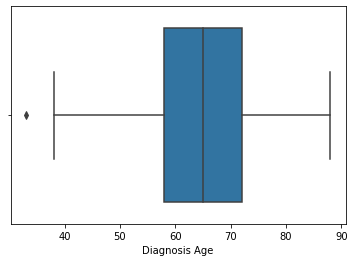

In [37]:
sns.boxplot(lung_nn['Diagnosis Age'])

<AxesSubplot:xlabel='Diagnosis Age'>

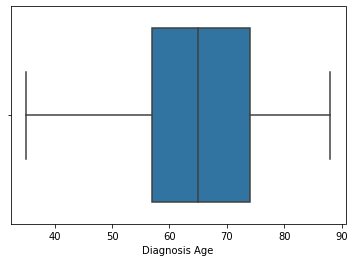

In [38]:
sns.boxplot(x=pancreas_nn['Diagnosis Age'])

Everything good looks so far

<AxesSubplot:xlabel='Mutation Count'>

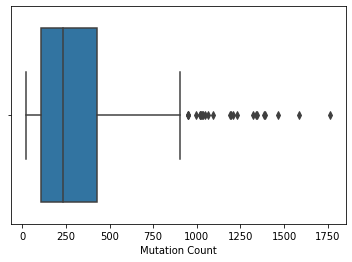

In [39]:
sns.boxplot(x=lung_simm['Mutation Count'])

Here we can see some 'mutation Count' values located over de Q75, but since one of the goals of the project would be precisely the behavior of high mutated organs in relation to caner environmets and also because we see progressive set of high values it is decided to keep these values.

<AxesSubplot:xlabel='Mutation Count'>

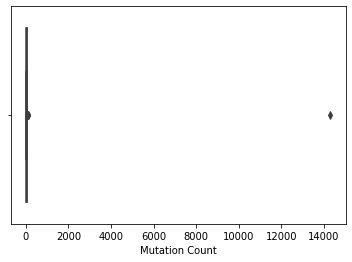

In [40]:
sns.boxplot(x=pancreas_simm['Mutation Count'])

On the other hand here we cn see a really strange isolated super high value located very far from any of ther ones. Since one single value won't add any significative information to the general analisys it is going to be removed from this set. We may study this ase separately further.

In [41]:
pancreas_simm.sort_values(by=['Mutation Count'], ascending= False)
pancreas_simm = pancreas_simm.drop('TCGA-IB-7651')
pancreas_nn = pancreas_nn.drop('TCGA-IB-7651')


In [ ]:
We will make the outliers analisys for the number of months the patients survived

<AxesSubplot:xlabel='Progress Free Survival (Months)'>

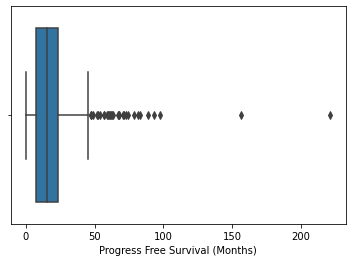

In [42]:
sns.boxplot(x=lung_nn['Progress Free Survival (Months)'])

This is kind of a mix case compared to the previous ones. So we will take a mix solution to keep the same criteria. Then we will remove the two super high isolated values but we are still interestedd in knowing more about how the set of progressive high values beyond Q75 behave.

In [43]:
lung_nn.sort_values(by=['Progress Free Survival (Months)'], ascending= False)

,TP53,KRAS,KEAP1,EGFR,STK11,ATM,SMARCA4,LRP1B,TP53: MUT,KRAS: MUT,...,STK11: MUT,ATM: MUT,SMARCA4: MUT,LRP1B: MUT,Tipos,Sex,Diagnosis Age,Progress Free Survival (Months),Ethnicity Category,Mutation Count
patient,,,,,,,,,,,,,,,,,,,,,
TCGA-49-AARQ,A,B,NaN,NaN,NaN,NaN,NaN,NaN,J,K,...,NaN,NaN,NaN,NaN,"A,B,J,K",Female,41,221.323602,Not Hispanic Or Latino,640
TCGA-49-AAR0,A,NaN,C,NaN,F,NaN,NaN,NaN,J,NaN,...,N,NaN,NaN,NaN,"A,C,F,J,L,N",Male,57,156.655817,Not Hispanic Or Latino,122
TCGA-38-4625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,...,NaN,NaN,NaN,Q,"I,Q",Female,66,97.741395,Not Hispanic Or Latino,540
TCGA-55-6983,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,...,NaN,NaN,NaN,NaN,"B,K",Male,81,92.809942,Not Hispanic Or Latino,106
TCGA-62-8399,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J,NaN,...,NaN,NaN,NaN,NaN,"A,J",Male,62,88.634645,Not Hispanic Or Latino,467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUAD-S01478,A,NaN,NaN,NaN,F,NaN,NaN,NaN,J,NaN,...,N,NaN,NaN,NaN,"A,F,J,N",Male,63,0.000000,European,493
LUAD-S00486,NaN,B,NaN,NaN,NaN,NaN,H,NaN,NaN,K,...,NaN,NaN,P,NaN,"B,H,K,P",Male,74,0.000000,European,179
LUAD-S00499,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,...,NaN,NaN,NaN,NaN,"B,K",Female,72,0.000000,European,64


In [44]:
lung_nn = lung_nn.drop(["TCGA-49-AARQ", "TCGA-49-AAR0"])
lung_simm = lung_simm.drop(["TCGA-49-AARQ", "TCGA-49-AAR0"])

Now we will check the correlation matrix both for lung and pancreas cases by using the df_simm

<AxesSubplot:>

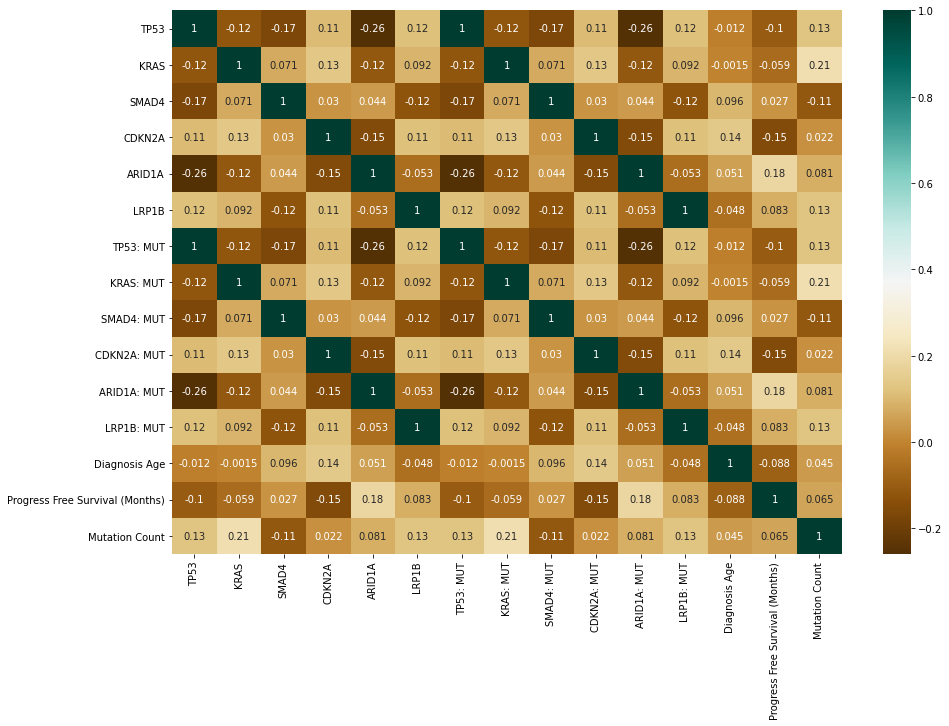

In [45]:
plt.figure(figsize=(15,10))
c_p_s = pancreas_simm.corr()
sns.heatmap(c_p_s , cmap="BrBG",annot=True)

In [ ]:
The main goal of the study lies on checking wether if survival time of the patients may be related or not with the type of mutation, the number of mutations, the age of the patients or their gender. Here we can observe these relations except for the one involving survivael with gender / ethnicity.

<AxesSubplot:>

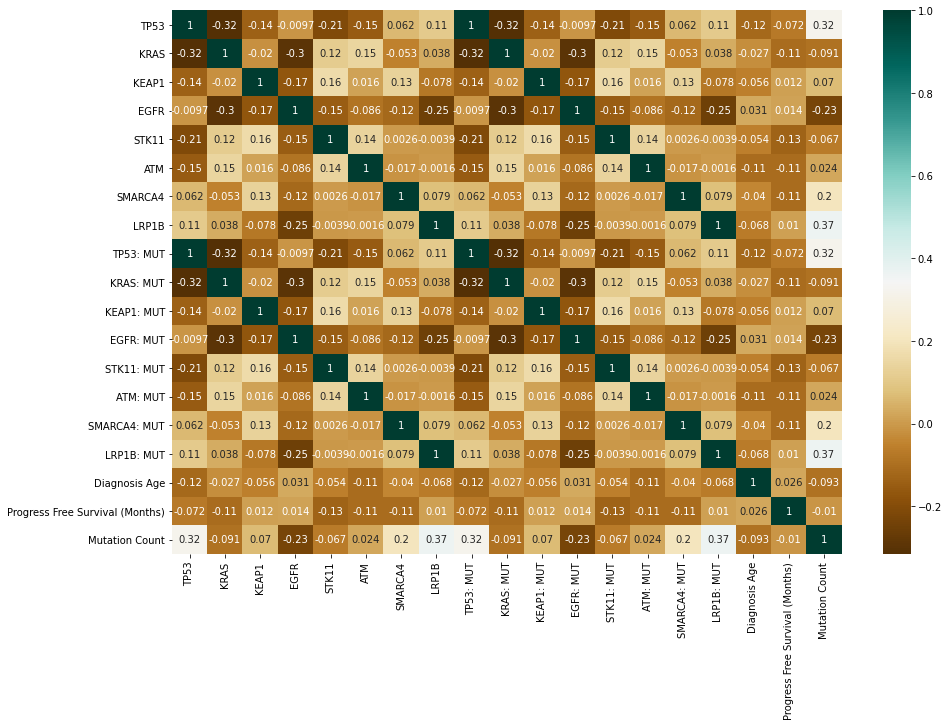

In [46]:
plt.figure(figsize=(15,10))
c_l_s = lung_simm.corr()
sns.heatmap(c_l_s, cmap="BrBG",annot=True)

Above: the matrix for lung cases.

Now lets check the correlations of interest with more detail both for Lung and Pancreas cases (for numeric parameters)

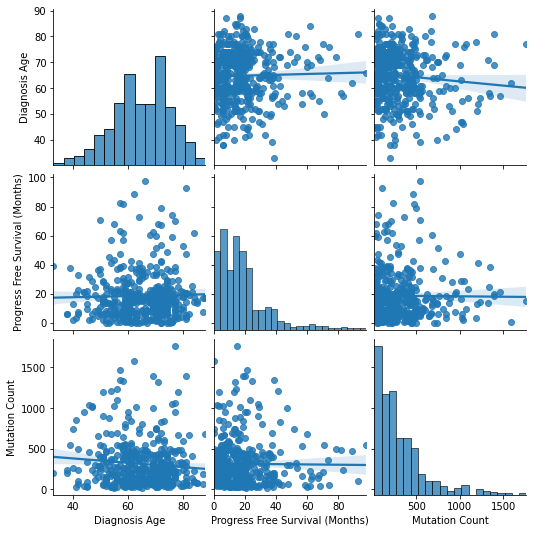

In [48]:
sns.pairplot(lung_nn, kind = 'reg')

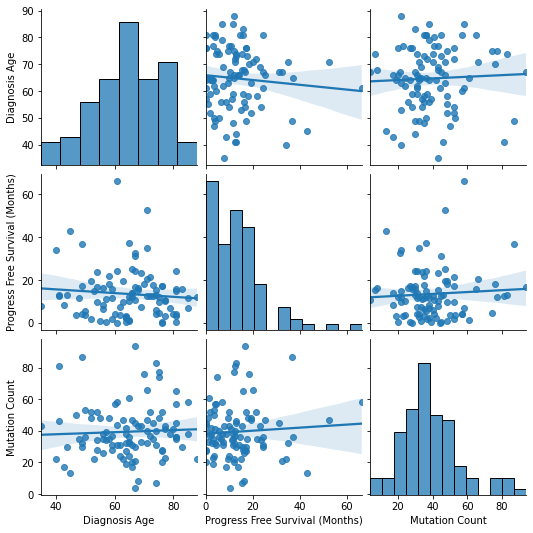

In [50]:
sns.pairplot(pancreas_nn, kind = 'reg')

Despite the above information is of interest, we may check how the parameters behave case by case. Since we are interested in the survivance of the ptients we will compare with it our parameters.

## MUTATION VS SURVIVANCE BY GENDER

### PANCREAS

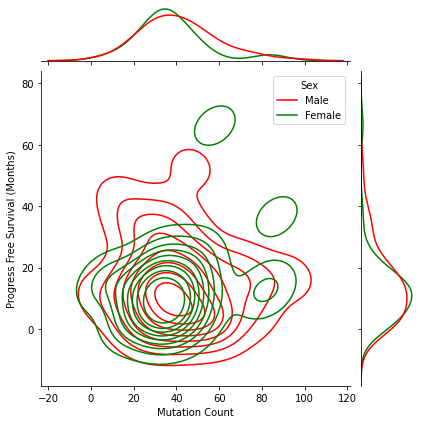

In [51]:
sns.jointplot(data=pancreas_nn, x="Mutation Count", y="Progress Free Survival (Months)", hue="Sex", kind="kde", palette=['red','green'], legend='full')

### LUNG

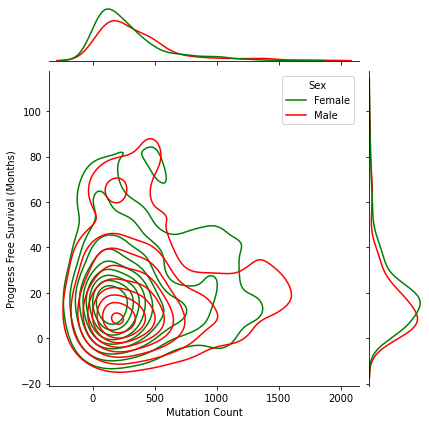

In [52]:
sns.jointplot(data=lung_nn, x="Mutation Count", y="Progress Free Survival (Months)", hue="Sex", kind="kde", palette=['green','red'], legend='full')

## AGE VS SURVIVANCE BY GENDER

### PANCREAS

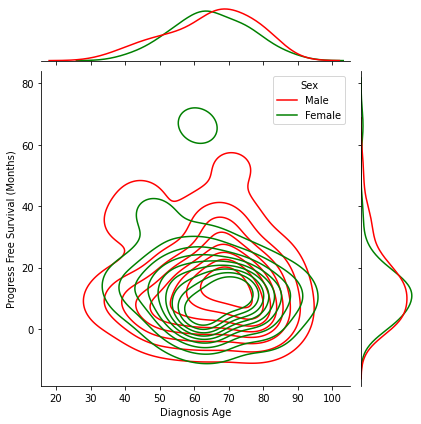

In [54]:
sns.jointplot(data=pancreas_nn, x="Diagnosis Age", y="Progress Free Survival (Months)", hue="Sex", kind="kde", palette=['red','green'], legend='full')

### LUNG

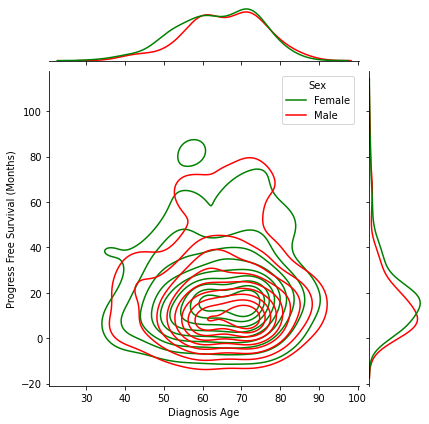

In [55]:
sns.jointplot(data=lung_nn, x="Diagnosis Age", y="Progress Free Survival (Months)", hue="Sex", kind="kde", palette=['green','red'], legend='full')

Now for the farst time we are going to take a look to the groups of mutationts found and the relation to the survival.

In [57]:
pancreas_nn.sort_values(by="Tipos", key=lambda x: x.str.len(), inplace= True)

## GROUPS OF MUTATIONS VS SURVIVANCE

<AxesSubplot:xlabel='Diagnosis Age', ylabel='Progress Free Survival (Months)'>

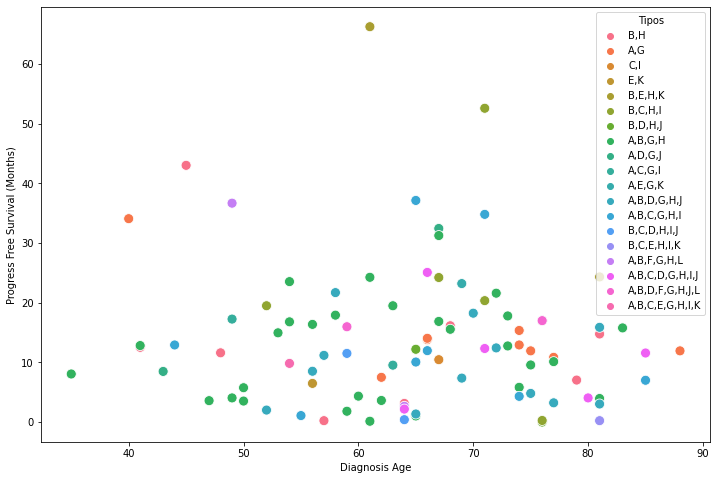

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pancreas_nn["Diagnosis Age"], y = pancreas_nn["Progress Free Survival (Months)"], hue = pancreas_nn['Tipos'], s = 100)